<a href="https://colab.research.google.com/github/DAVIDKSOUSA/DATA_SCIENCE/blob/master/Estudo%20Carteira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Curso Udemy

###Calcular a taxa de retorno de um único ativo (BOVA11).

In [131]:
#Importando as bibliotecas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb

%inline matplotlib


UsageError: Line magic function `%inline` not found.


In [0]:
#Importando apenas o Adj Close de uma determinada carteira.
df_bova = wb.DataReader("BOVA11.SA", data_source= "yahoo", start="2018-01-01")

In [3]:
df_bova.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-17,76.930000,74.849998,76.459999,76.000000,7119750.0,76.000000
2020-04-20,77.239998,74.120003,74.160004,75.940002,8754410.0,75.940002
2020-04-22,78.250000,75.989998,76.000000,77.820000,9776490.0,77.820000
2020-04-23,78.730003,75.650002,78.360001,76.730003,12592630.0,76.730003
2020-04-24,75.500000,69.099998,75.400002,72.410004,45899510.0,72.410004


In [4]:
#Calcular a taxa de retorno simples  - Geralmente é mais utilizado para comparar ativos diferentes.
df_bova["retorno_simples"] = (df_bova["Adj Close"]/df_bova["Adj Close"].shift(1)) -1
#Transformando a série de dados em um DataFrame
pd.DataFrame(df_bova["retorno_simples"])

,retorno_simples
Date,
2018-01-02,NaN
2018-01-03,0.002663
2018-01-04,0.009296
2018-01-05,0.005790
2018-01-08,0.004186
...,...
2020-04-17,0.014280
2020-04-20,-0.000789
2020-04-22,0.024756


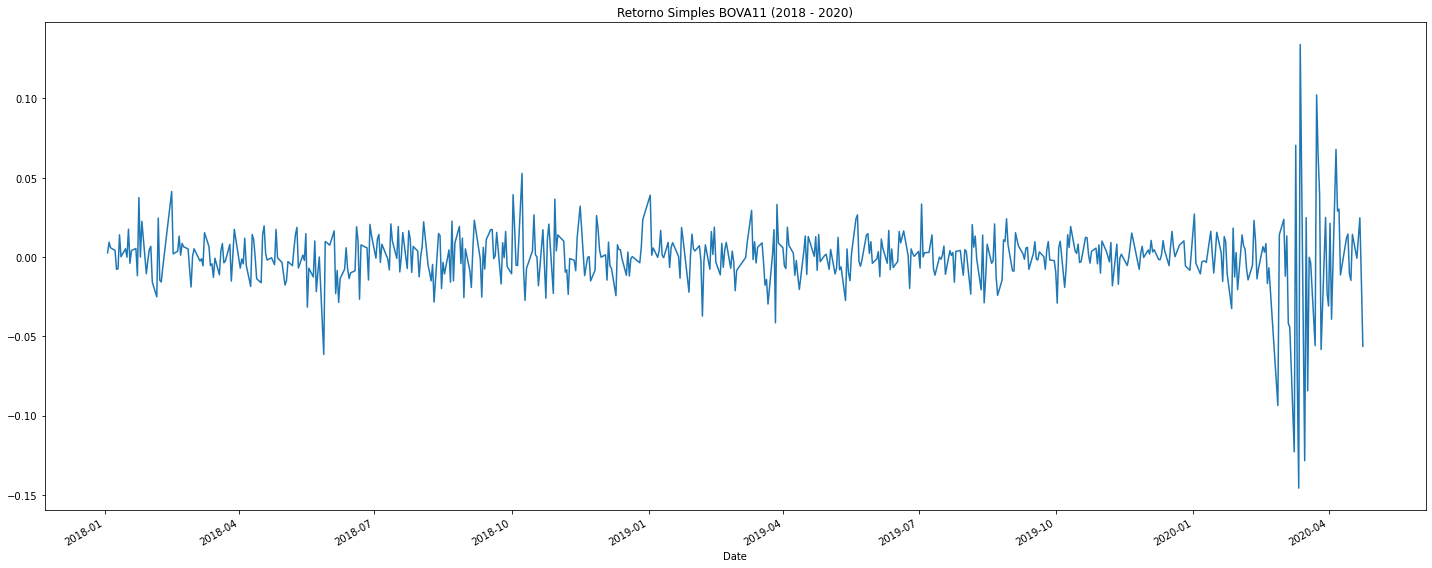

In [5]:
#Plotar em um gráfico.
fig, ax = plt.subplots()
df_bova["retorno_simples"].plot(figsize = (20,8))
ax.set_title("Retorno Simples BOVA11 (2018 - 2020)")
plt.tight_layout();

In [6]:
#Calcular a taxa média de retorno diária .mean().
taxa_retorno_diaria = df_bova["retorno_simples"].mean()
print("Taxa Média de Retorno Diário:", taxa_retorno_diaria*100,"%")


Taxa Média de Retorno Diário: 0.014168009825559442 %


In [7]:
#Calcular a taxa média de retorno anual.
taxa_retorno_anual = df_bova["retorno_simples"].mean()*250
taxa_retorno_anual

0.03542002456389861

In [8]:
#arredondar o valor e transformar em uma string.
print(str(round(taxa_retorno_anual, 5) * 100),"%")

3.542 %


In [9]:
#Calcular a taxa de Retorno Logarítimico - Geralmente é utilizado com um único ativo.
df_bova.head()

,High,Low,Open,Close,Volume,Adj Close,retorno_simples
Date,,,,,,,
2018-01-02,75.230003,74.000000,74.000000,75.099998,2292470.0,75.099998,NaN
2018-01-03,75.769997,74.900002,75.000000,75.300003,3765200.0,75.300003,0.002663
2018-01-04,76.440002,75.510002,75.540001,76.000000,2245750.0,76.000000,0.009296
2018-01-05,76.440002,75.559998,76.000000,76.440002,2288790.0,76.440002,0.005790
2018-01-08,76.760002,75.930000,76.330002,76.760002,2544400.0,76.760002,0.004186


In [10]:
df_bova["retorno_logaritmico"] = np.log(df_bova["Adj Close"]/df_bova["Adj Close"].shift(1))
df_bova["retorno_logaritmico"]

Date
2018-01-02         NaN
2018-01-03    0.002660
2018-01-04    0.009253
2018-01-05    0.005773
2018-01-08    0.004178
                ...   
2020-04-17    0.014179
2020-04-20   -0.000790
2020-04-22    0.024455
2020-04-23   -0.014106
2020-04-24   -0.057948
Name: retorno_logaritmico, Length: 569, dtype: float64

In [91]:
bova11 = round(pd.DataFrame(df_bova["retorno_logaritmico"]), 6)*100
bova11

,retorno_logaritmico
Date,
2018-01-02,NaN
2018-01-03,0.2660
2018-01-04,0.9253
2018-01-05,0.5773
2018-01-08,0.4178
...,...
2020-04-17,1.4179
2020-04-20,-0.0790
2020-04-22,2.4455


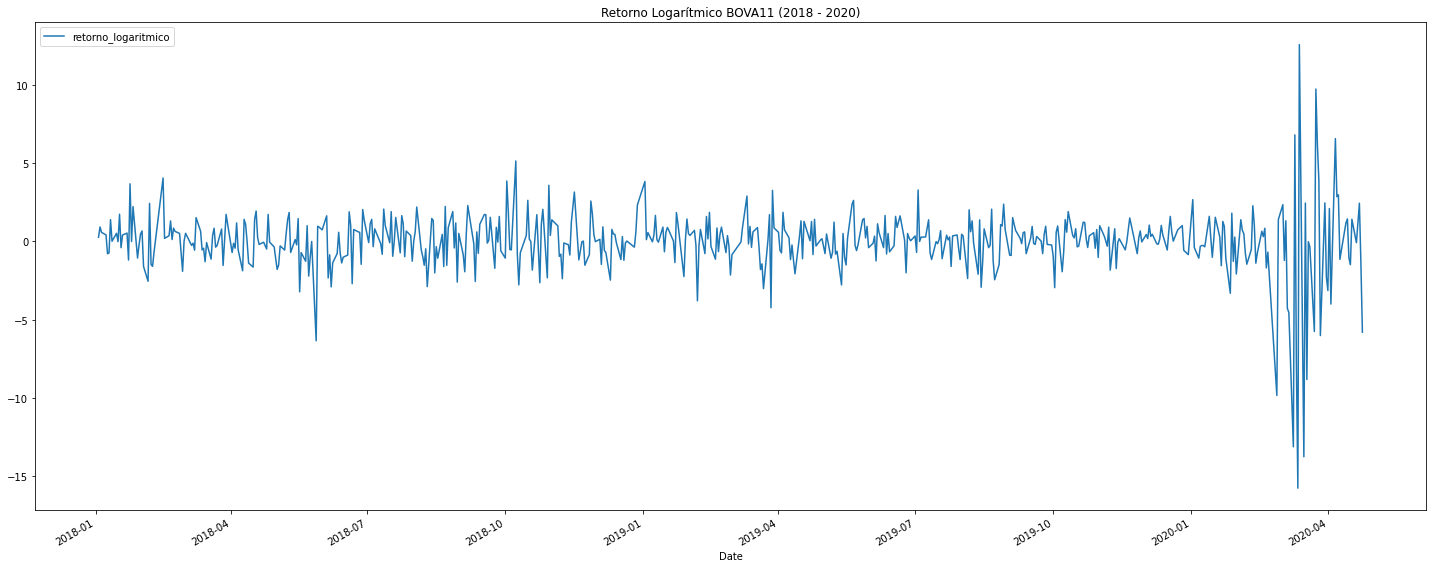

In [93]:

bova11.plot(figsize = (20,8), title = "Retorno Logarítmico BOVA11 (2018 - 2020)")
ax.set_title("Retorno Logarítmico BOVA11 (2018 - 2020)")
plt.tight_layout();

In [87]:
#Calcular a taxa média de retorno diária .mean().
taxa_retorno_logaritmico_diaria = df_bova["retorno_logaritmico"].mean()
print("Taxa Média de Retorno Logarítmico Diário:", taxa_retorno_logaritmico_diaria * 100,"%")

Taxa Média de Retorno Logarítmico Diário: -0.006421844450134094 %


In [13]:
taxa_retorno_logaritmico_anual = df_bova["retorno_logaritmico"].mean() * 250
taxa_retorno_logaritmico_anual

-0.016054611125335235

In [14]:
print(str(round(taxa_retorno_logaritmico_anual,5)*100),"%")

-1.6049999999999998 %


###Calcular a taxa de retonode um portifólio.

In [0]:
#Importando apenas o Adj Close de uma determinada carteira.
carteira = ["ALPA4.SA",
            "AMAR3.SA",
            "AZUL4.SA",
            "B3SA3.SA",
            "BBAS3.SA",
            "BIDI4.SA",
            "BRML3.SA",
            "CEAB3.SA",
            "COGN3.SA",
            "EGIE3.SA",
            "ELET6.SA",
            "FLRY3.SA",
            "GNDI3.SA",
            "HAPV3.SA",
            "IGTA3.SA",
            "IRBR3.SA",
            "JBSS3.SA",
            "LAME4.SA",
            "LCAM3.SA",
            "MGLU3.SA",
            "MILS3.SA",
            "MOVI3.SA",
            "MRFG3.SA",
            "NTCO3.SA",
            "OIBR4.SA",
            "PETR3.SA",
            "RAPT4.SA",
            "SAPR11.SA",
            "SBSP3.SA",
            "SLCE3.SA",
            "SULA11.SA",
            "TUPY3.SA",
            "UGPA3.SA",
            "VALE3.SA",
            "VVAR3.SA",
            "WEGE3.SA",
            "WIZS3.SA"]
df_carteira = pd.DataFrame()
for acoes in carteira:
  df_carteira[acoes] = wb.DataReader(acoes, data_source = "yahoo", start = "2020-1-1")["Adj Close"]

In [0]:
#Tratar valores faltantes.
#Saber quais colunas possuem valores faltantes, quantos valores faltantes e analisar o que utilizar para substituí-los

In [96]:
df_carteira.tail()

,ALPA4.SA,AMAR3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BIDI4.SA,BRML3.SA,CEAB3.SA,COGN3.SA,EGIE3.SA,ELET6.SA,FLRY3.SA,GNDI3.SA,HAPV3.SA,IGTA3.SA,IRBR3.SA,JBSS3.SA,LAME4.SA,LCAM3.SA,MGLU3.SA,MILS3.SA,MOVI3.SA,MRFG3.SA,NTCO3.SA,OIBR4.SA,PETR3.SA,RAPT4.SA,SAPR11.SA,SBSP3.SA,SLCE3.SA,SULA11.SA,TUPY3.SA,UGPA3.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,WIZS3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-17,26.330000,5.8,16.190001,39.529999,29.580000,9.22,9.59,9.09,5.04,40.049999,29.340000,23.719999,55.599998,52.400002,31.500000,11.92,21.309999,21.750000,13.41,44.590000,5.12,10.18,9.38,33.340000,1.10,16.472483,7.88,NaN,42.169998,22.660000,NaN,14.70,14.05,44.000000,6.48,38.459999,9.00
2020-04-20,26.580000,5.8,16.680000,40.590000,28.990000,9.50,10.15,9.24,5.09,40.630001,29.209999,24.580000,57.540001,54.070000,32.799999,11.93,21.350000,22.830000,14.06,48.480000,5.19,10.74,9.57,33.459999,1.06,16.324524,8.05,NaN,41.509998,23.500000,NaN,14.01,14.20,42.459999,6.59,39.099998,9.40
2020-04-22,27.520000,6.4,16.309999,42.009998,28.860001,9.55,10.47,9.80,5.08,41.029999,29.969999,24.250000,56.849998,53.310001,34.599998,11.06,21.799999,25.170000,14.99,50.549999,5.45,11.68,10.33,35.000000,1.06,16.916351,8.52,NaN,43.669998,24.799999,NaN,14.50,14.40,42.900002,7.40,40.919998,9.80
2020-04-23,27.160000,6.2,16.370001,41.250000,28.049999,9.92,10.61,9.10,4.90,40.869999,28.709999,24.200001,54.279999,50.970001,35.790001,10.12,21.799999,24.459999,13.83,49.470001,5.53,11.35,10.47,34.599998,1.06,17.340000,8.42,NaN,42.380001,23.959999,NaN,14.23,14.54,43.509998,7.36,39.590000,9.74
2020-04-24,26.459999,5.9,13.990000,37.000000,24.299999,9.00,9.30,7.94,4.61,38.230000,24.930000,23.110001,52.040001,50.000000,32.340000,9.07,21.540001,22.500000,12.88,47.380001,5.23,10.03,10.45,33.230000,0.98,16.070000,7.69,23.299999,37.770000,24.420000,44.290001,14.75,13.49,43.759998,6.38,38.709999,9.40


In [18]:
df_carteira.describe()

,ALPA4.SA,AMAR3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BIDI4.SA,BRML3.SA,CEAB3.SA,COGN3.SA,EGIE3.SA,ELET6.SA,FLRY3.SA,GNDI3.SA,HAPV3.SA,IGTA3.SA,IRBR3.SA,JBSS3.SA,LAME4.SA,LCAM3.SA,MGLU3.SA,MILS3.SA,MOVI3.SA,MRFG3.SA,NTCO3.SA,OIBR4.SA,PETR3.SA,RAPT4.SA,SAPR11.SA,SBSP3.SA,SLCE3.SA,SULA11.SA,TUPY3.SA,UGPA3.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,WIZS3.SA
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,48.000000,77.000000,77.000000,48.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,30.275453,10.313896,39.799221,43.233611,40.462637,13.512239,14.700130,12.892208,8.757013,46.962467,33.743506,26.908387,60.152618,53.693469,44.852658,25.380156,23.949610,24.232172,18.644396,47.826653,7.616104,16.156442,10.415974,38.818182,1.207143,23.764767,10.706104,101.200416,52.678312,22.359480,59.432485,20.023506,19.501940,47.471818,10.696364,38.674984,11.895531
std,5.022173,4.156196,20.012604,5.623011,10.170489,3.718553,4.194303,4.358858,3.271723,5.777627,7.178279,4.794273,12.201725,9.013186,11.017657,14.516667,3.793021,3.934964,5.925437,8.234039,2.429258,5.390808,1.734925,9.166637,0.204822,7.900562,3.781339,12.197635,11.118336,1.955988,6.534336,5.954935,5.667181,6.203288,4.157800,5.094008,2.550168
min,17.600000,3.750000,10.350000,30.205217,22.129999,6.884902,7.900000,5.300000,3.660000,37.560001,18.480000,18.139999,33.384838,31.719999,26.969999,6.875677,16.750000,16.170000,8.199930,28.686602,3.360000,7.710000,6.440000,21.250000,0.850000,10.899457,4.850000,23.299999,30.549999,18.400000,41.200001,10.490000,10.690000,34.099998,4.100000,26.445274,6.944983
25%,25.990000,5.630000,16.370001,39.009998,29.580000,9.678774,9.960000,8.500000,5.060000,40.630001,26.950001,21.639999,50.230000,48.299999,32.000000,10.018844,20.870001,21.020000,12.810000,41.471607,5.110000,9.960000,9.180000,29.000000,0.980000,16.070000,6.800000,99.450001,41.459999,20.740000,59.016651,13.470000,14.050000,42.900002,6.320000,34.849514,9.300000
50%,32.500000,13.260000,45.130001,44.291065,46.625092,15.276499,16.750000,15.590000,10.430000,48.799999,36.049999,30.067104,63.779987,55.200001,51.630001,31.942432,23.420000,26.030001,21.183153,50.034771,8.990000,18.830000,10.660000,41.000000,1.270000,27.717171,12.000000,102.605000,58.599998,22.580000,61.500019,22.150000,19.950001,46.849998,11.660000,38.732746,13.113226
75%,34.546654,13.700000,59.000000,48.298584,49.108528,16.863018,18.500000,16.600000,11.690000,52.049999,40.230000,30.762920,70.925339,61.299999,54.551868,40.419163,27.299999,27.430000,23.866949,55.560997,9.700000,20.930000,11.650000,47.470001,1.380000,31.149759,14.240000,104.607502,61.759998,23.840000,63.637852,25.889999,24.943426,53.070000,14.450000,41.829372,14.273769
max,37.911461,15.280000,62.410000,52.702896,53.052986,19.108095,19.219999,18.100000,12.790000,54.099998,42.660000,32.830769,76.067604,69.090309,56.863056,44.102558,30.090000,29.059999,25.451477,58.597931,10.850000,22.490000,13.990000,50.889999,1.570000,32.580002,14.920000,111.099998,66.470001,25.990000,66.640762,26.770000,27.461466,57.360001,16.639999,49.585880,14.913439


In [19]:
ultima_cotacao = df_carteira.iloc[-1].round(2)
ultima_cotacao = pd.DataFrame(ultima_cotacao.round(2))
ultima_cotacao

,2020-04-24
ALPA4.SA,26.46
AMAR3.SA,5.90
AZUL4.SA,13.99
B3SA3.SA,37.00
BBAS3.SA,24.30
BIDI4.SA,9.00
BRML3.SA,9.30
CEAB3.SA,7.94
COGN3.SA,4.61
EGIE3.SA,38.23


In [115]:
#Normalizar para a base 100.
df_carteira.iloc[0].sort_values()

OIBR4.SA       1.240000
MRFG3.SA      10.060000
MILS3.SA      10.120000
VVAR3.SA      11.730000
COGN3.SA      12.200000
WIZS3.SA      13.113226
AMAR3.SA      13.460000
RAPT4.SA      14.300000
BIDI4.SA      15.665645
CEAB3.SA      18.100000
BRML3.SA      18.219999
MOVI3.SA      19.449736
LCAM3.SA      22.965748
UGPA3.SA      25.279165
TUPY3.SA      25.350000
SLCE3.SA      25.990000
LAME4.SA      26.785116
JBSS3.SA      27.200001
FLRY3.SA      30.290081
PETR3.SA      32.353138
ALPA4.SA      32.529774
WEGE3.SA      35.088482
NTCO3.SA      38.330002
ELET6.SA      38.709999
IRBR3.SA      39.181538
B3SA3.SA      44.747368
MGLU3.SA      49.118713
EGIE3.SA      52.000000
BBAS3.SA      53.052986
IGTA3.SA      54.292858
VALE3.SA      54.330002
AZUL4.SA      58.799999
SBSP3.SA      60.549999
SULA11.SA     61.370754
HAPV3.SA      66.286797
GNDI3.SA      71.413658
SAPR11.SA    100.610001
Name: 2020-01-02 00:00:00, dtype: float64

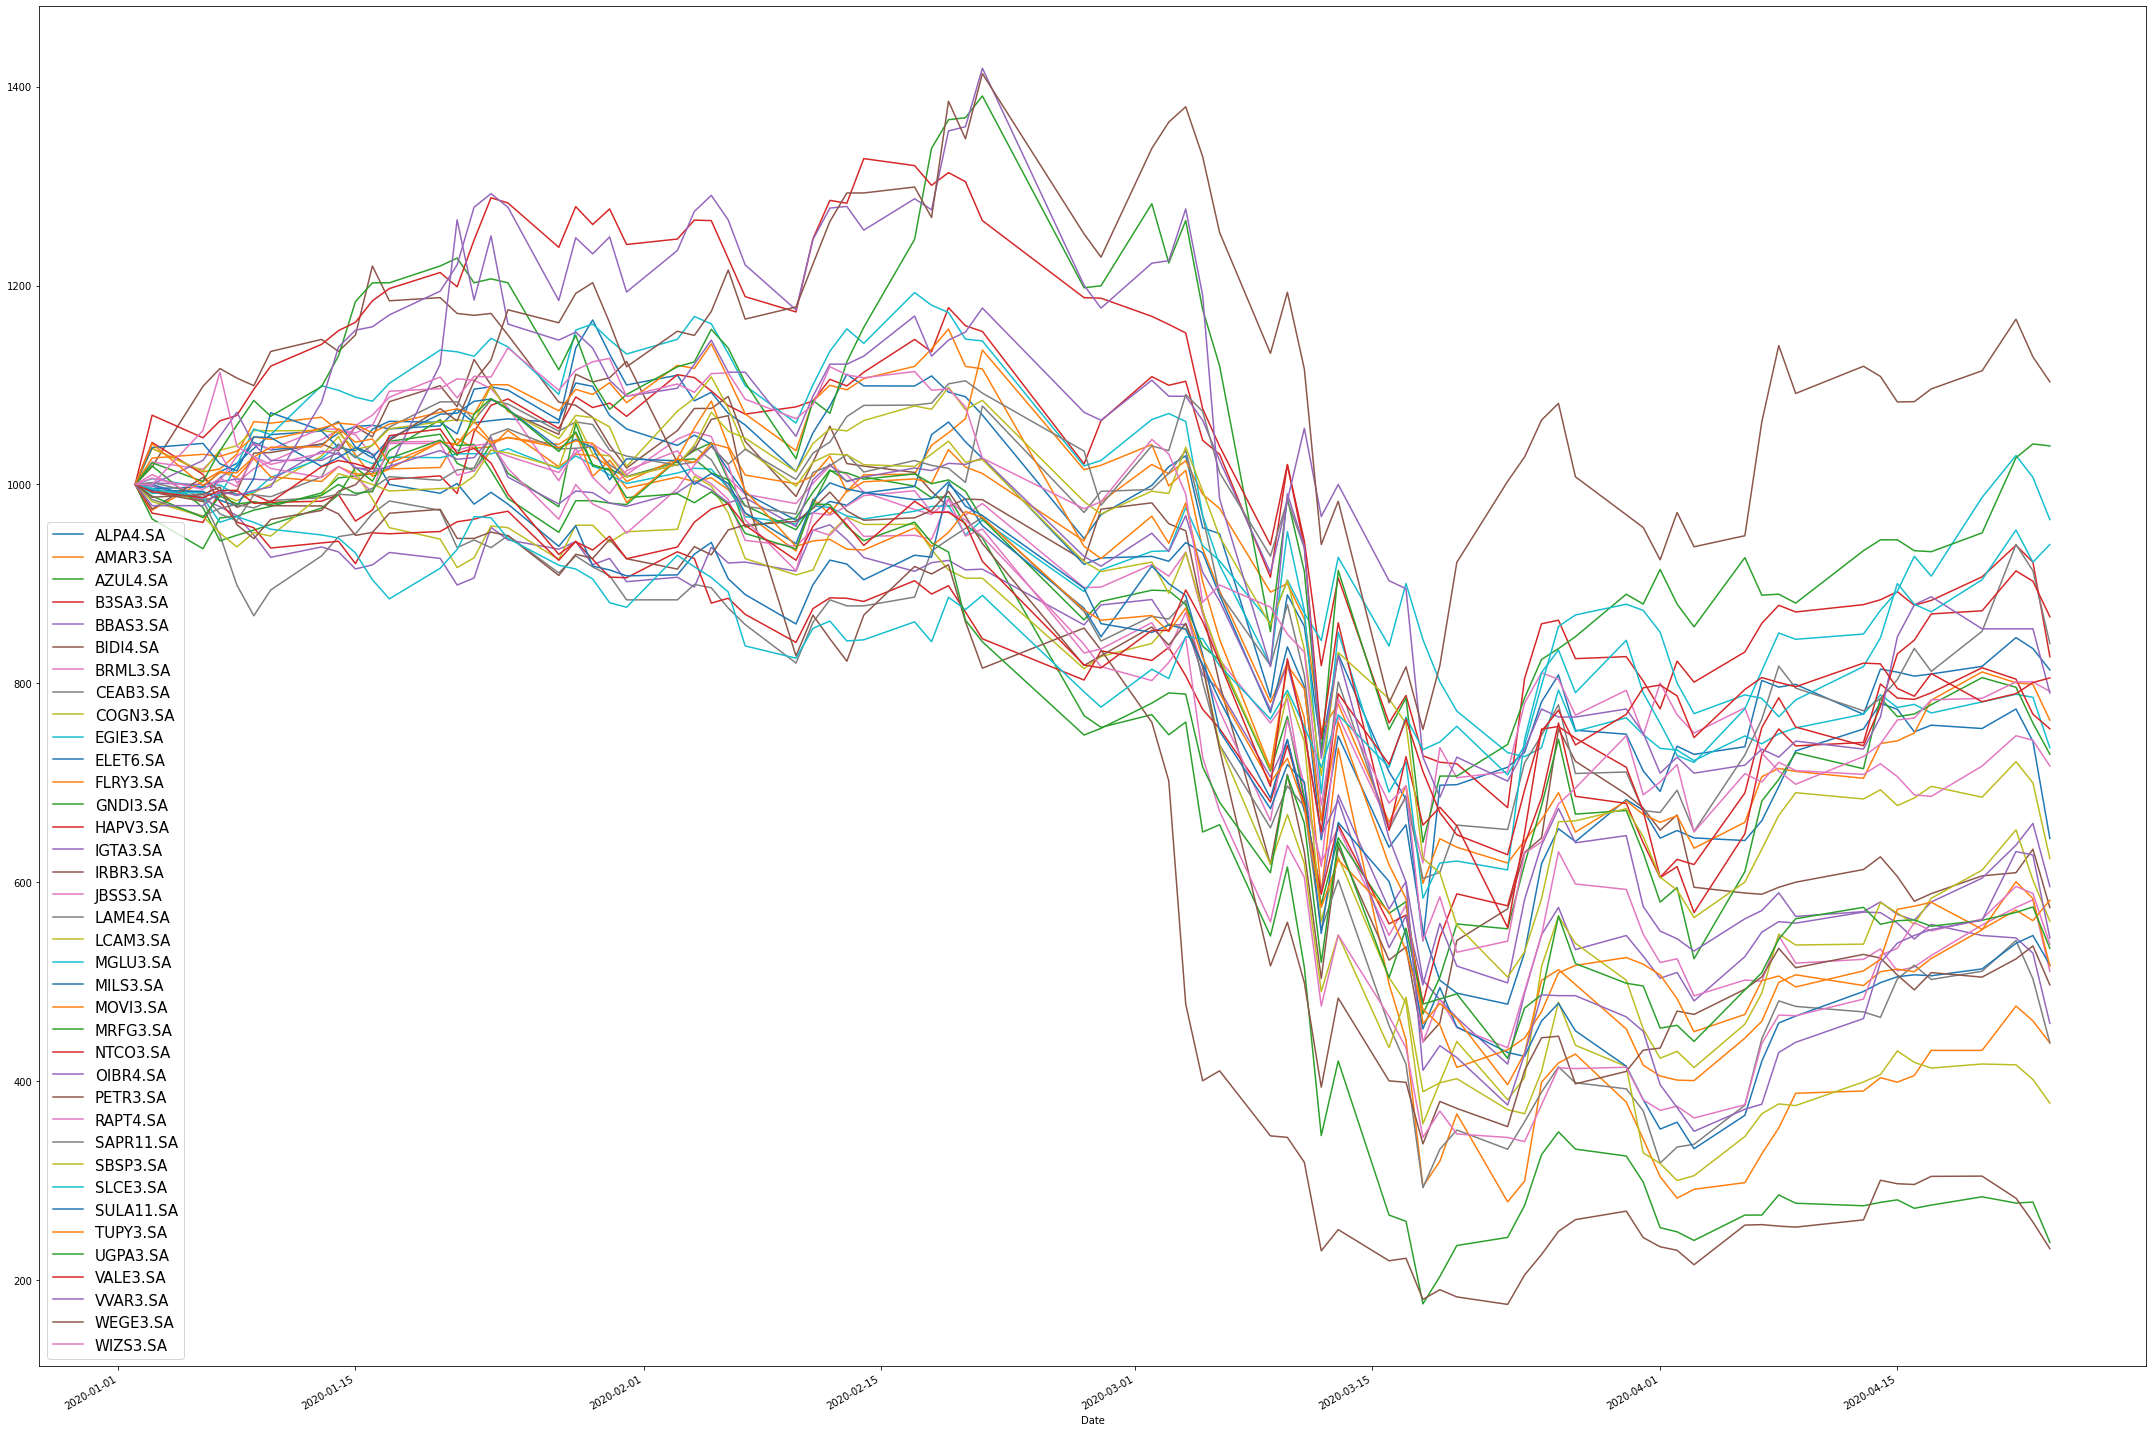

In [132]:
#Criar um gráfico de linhas para analisa io comportamento dos ativos no período.


(df_carteira/df_carteira.iloc[0]*1000).plot(figsize = (30,20))
plt.legend(fontsize=15, loc = "lower left")
plt.tight_layout();



In [119]:
retorno_carteira = (df_carteira/df_carteira.shift(1)) - 1
retorno_carteira.head(75)

,ALPA4.SA,AMAR3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BIDI4.SA,BRML3.SA,CEAB3.SA,COGN3.SA,EGIE3.SA,ELET6.SA,FLRY3.SA,GNDI3.SA,HAPV3.SA,IGTA3.SA,IRBR3.SA,JBSS3.SA,LAME4.SA,LCAM3.SA,MGLU3.SA,MILS3.SA,MOVI3.SA,MRFG3.SA,NTCO3.SA,OIBR4.SA,PETR3.SA,RAPT4.SA,SAPR11.SA,SBSP3.SA,SLCE3.SA,SULA11.SA,TUPY3.SA,UGPA3.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,WIZS3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.000000,0.036404,-0.034694,-0.028818,-0.001673,0.017834,0.022503,-0.005525,-0.004098,0.005769,-0.004133,-0.025803,0.018699,0.042294,0.001468,-0.007771,0.009926,0.001866,0.036223,-0.008920,-0.005929,0.026558,0.021869,0.069658,0.000000,-0.024695,0.006294,-0.015108,-0.017176,-0.004232,0.037103,0.041026,-0.011719,-0.007362,-0.021313,-0.012770,0.000000
2020-01-06,-0.015654,-0.022939,-0.031008,-0.009587,-0.013219,0.079474,-0.006978,-0.010556,-0.013169,-0.008413,0.001556,0.029558,-0.041233,-0.030834,-0.001649,-0.009348,-0.023662,-0.011546,-0.022056,0.000818,-0.000994,0.003692,-0.018482,-0.021219,0.024194,0.032510,-0.011119,-0.016954,-0.015292,-0.008887,0.004062,-0.040546,-0.021739,-0.005934,0.000000,0.002587,0.054355
2020-01-07,0.022763,0.002935,0.033091,0.032266,-0.007547,0.016232,0.016216,-0.035373,0.007506,0.002121,0.015281,0.010323,-0.034148,-0.027479,0.002936,0.006631,0.017897,-0.019970,0.020851,-0.002861,-0.008955,-0.001996,0.030723,0.016197,0.023622,-0.013624,0.011244,0.008110,-0.017065,-0.025341,-0.019605,0.013033,0.022222,0.007275,0.014808,0.007741,0.055519
2020-01-08,0.010976,0.014631,0.001760,-0.002679,-0.009125,-0.008557,-0.029255,-0.052969,-0.006623,-0.010006,0.008418,-0.006066,0.005917,-0.020577,0.002745,0.003800,0.024542,-0.007305,0.004168,0.030744,-0.006024,0.005000,0.025000,0.005150,0.023077,-0.016268,-0.008339,0.003971,-0.014757,0.006000,-0.007142,0.000000,-0.007905,0.000185,-0.004292,-0.037838,-0.067001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-15,-0.003775,-0.011050,0.009174,0.009100,-0.018537,-0.031633,-0.041195,0.083333,0.058468,-0.016098,-0.007618,0.003571,-0.023720,-0.017739,-0.021587,-0.011686,0.032836,0.024263,-0.018032,0.022144,0.011881,0.005040,0.000000,0.067831,0.105263,-0.032596,0.013280,NaN,-0.022879,0.064604,NaN,0.096677,0.006383,-0.030092,0.037767,-0.023136,-0.018028
2020-04-16,-0.004926,0.016760,-0.030303,-0.015280,-0.028668,-0.041096,0.007519,0.027473,-0.026667,0.003966,-0.029372,0.010676,0.003471,-0.001729,-0.010383,-0.002534,0.002408,0.039015,-0.019893,0.039225,0.003914,-0.005015,-0.011579,0.016667,0.038095,-0.029483,0.048493,NaN,0.011219,-0.023077,NaN,0.005510,0.001409,-0.009956,0.014240,0.000263,-0.025918
2020-04-17,0.002666,0.062271,0.011875,0.005596,0.027083,0.013187,0.022388,-0.027808,-0.013699,-0.011111,0.008941,0.044014,0.012197,0.008468,0.032787,0.027564,0.024027,-0.027716,0.046838,-0.021505,-0.001949,0.026210,-0.001065,0.031240,0.009174,0.035338,-0.015000,NaN,0.017125,-0.008749,NaN,0.006849,-0.011260,0.028999,0.010920,0.011839,-0.002217


In [0]:
#Transformar os pesos em uma matrix
pesos = np.array([
2.95,
0.69,
2.62,
4.50,
3.09,
2.56,
1.12,
1.58,
2.72,
6.60,
1.61,
2.60,
3.05,
2.86,
1.85,
5.93,
2.34,
4.05,
1.61,
5.42,
2.63,
1.25,
4.43,
1.88,
0.85,
2.76,
1.37,
4.13,
2.34,
3.99,
2.55,
0.78,
0.77,
4.60,
0.00,
4.39,
1.58])

In [138]:
#Multiplicar as matrizes
np.dot(retorno_carteira, pesos)

array([         nan,   0.08415955,  -0.59993116,   0.37179935,
        -0.24528068,   0.91419174,   0.20719048,   1.32911451,
         0.75000254,  -0.26923375,   0.20512349,   1.14925233,
         1.1301206 ,  -0.5638802 ,   0.93346174,   0.89403451,
        -0.65167559,  -3.21818086,   2.65763383,  -1.03587475,
        -0.97802874,  -1.06162503,   1.16206341,   0.76225123,
         0.57575896,  -1.2876317 ,  -2.71896749,  -3.12611324,
         3.32115838,   1.38001513,  -0.10016361,   0.19525655,
         1.67506397,  -0.16434313,   1.58939184,  -1.79977115,
        -0.32891055,  -9.02309103,   0.20030203,   2.46890503,
        -1.02072478,  -0.19504817,  -6.2597568 ,  -3.99622706,
       -12.7595686 ,   8.62313659,  -7.03849969,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,       

In [142]:
#Respectivo retorno anual de cada ativo
retorno_carteira_anual = round(retorno_carteira.mean(),7)*76 # *250
retorno_carteira_anual

ALPA4.SA    -0.053147
AMAR3.SA    -0.447306
AZUL4.SA    -1.015383
B3SA3.SA    -0.086496
BBAS3.SA    -0.651799
BIDI4.SA    -0.339348
BRML3.SA    -0.530404
CEAB3.SA    -0.594229
COGN3.SA    -0.772768
EGIE3.SA    -0.268105
ELET6.SA    -0.307504
FLRY3.SA    -0.201734
GNDI3.SA    -0.160884
HAPV3.SA    -0.154782
IGTA3.SA    -0.390678
IRBR3.SA    -1.164419
JBSS3.SA    -0.099279
LAME4.SA    -0.038502
LCAM3.SA    -0.339135
MGLU3.SA     0.147090
MILS3.SA    -0.500840
MOVI3.SA    -0.473997
MRFG3.SA     0.235965
NTCO3.SA     0.034192
OIBR4.SA    -0.140494
PETR3.SA    -0.487988
RAPT4.SA    -0.437228
SAPR11.SA   -0.079192
SBSP3.SA    -0.359472
SLCE3.SA    -0.008079
SULA11.SA   -0.608616
TUPY3.SA    -0.459390
UGPA3.SA    -0.441469
VALE3.SA    -0.105123
VVAR3.SA    -0.305277
WEGE3.SA     0.214312
WIZS3.SA    -0.198436
dtype: float64

In [143]:
#Multiploicar o retorno anual pelo pesos achamos o retono anual da carteira
np.dot(retorno_carteira_anual, pesos)

-27.692165144

In [0]:
#Comparar o retorno anual da minha carteira com o de outra.
#pesos_2 = np.array([0.25, 0.4, 0.35])

#pfolio_1 = str(round(np.dot(retorno_carteira_anual, pesos), 5)*100)+"%"
#pfolio_2 = str(round(np.dot(retorno_carteira_anual, pesos_2), 5)*100)+"%"

#print(pfolio_1)
#print(pfolio_2)

In [0]:
#Comparaçao indices e minha carteira.
indices = ["BOVA11.SA"]
df_indices = pd.DataFrame()
for t in indices:
   df_indices[t] = wb.DataReader(t, data_source = "yahoo", start = '2020-01-01')['Adj Close']

In [29]:
df_indices.head()

,BOVA11.SA
Date,
2020-01-02,114.239998
2020-01-03,113.800003
2020-01-06,112.589996
2020-01-07,112.239998
2020-01-08,111.949997


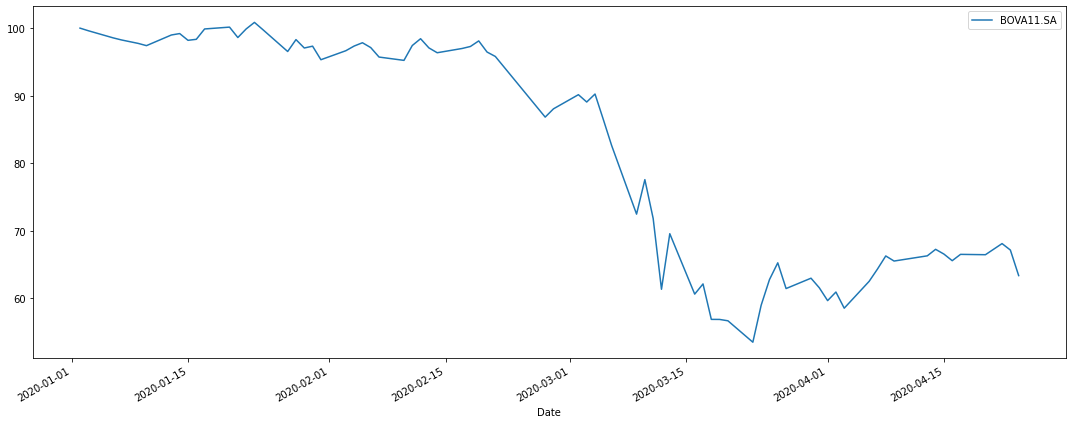

In [30]:
(df_indices/df_indices.iloc[0]*100).plot(figsize=(15,6))
plt.tight_layout();

In [31]:
#Calcular os retornos simples dos índices.
df_indices_retorno = (df_indices/df_indices.shift(1)) -1
df_indices_retorno.head()

,BOVA11.SA
Date,
2020-01-02,NaN
2020-01-03,-0.003851
2020-01-06,-0.010633
2020-01-07,-0.003109
2020-01-08,-0.002584


In [32]:
#Aparentemente o IBOV superou o SP 500
df_indices_retorno_anual = df_indices_retorno.mean()*75
df_indices_retorno_anual

BOVA11.SA   -0.375838
dtype: float64

#Como medir o risco de um ativo.



In [0]:
tickers = ["PETR4.SA", "VALE3.SA"]
sec_data = pd.DataFrame()
for t in tickers :
  sec_data[t] = wb.DataReader(t, data_source = "yahoo", start = "1990-01-01")["Adj Close"]


In [34]:
sec_data.head(3)

,PETR4.SA,VALE3.SA
Date,,
2000-01-03,4.050294,2.266039
2000-01-04,3.826235,2.212088
2000-01-05,3.787627,2.212088


In [0]:
sec_returns = np.log(sec_data/sec_data.shift(1))

In [36]:
sec_returns

,PETR4.SA,VALE3.SA
Date,,
2000-01-03,NaN,NaN
2000-01-04,-0.056908,-0.024096
2000-01-05,-0.010141,0.000000
2000-01-06,-0.003464,0.000000
2000-01-07,0.004555,0.035932
...,...,...
2020-04-17,0.025747,0.028587
2020-04-20,-0.011222,-0.035627
2020-04-22,0.048939,0.010309


In [37]:
sec_returns['PETR4.SA'].mean()*250

0.0686158072361501

In [38]:
#Lembrar de tirar a raiz quadrada de 250, pois o std é a raiz da variância.
sec_returns['PETR4.SA'].std()*250**0.5

0.4337360390901238

In [39]:
#Para compara as duas em empresas basta verificar a que tem menor desvio padrao com o maior retorno
#basta fazer o mesmo método para vale.

#temos que utilizar dois colchetes pois representa um array com duas dimensões.
sec_returns[["PETR4.SA", "VALE3.SA"]].mean()*250

PETR4.SA    0.068616
VALE3.SA    0.148224
dtype: float64

In [40]:
sec_returns[["PETR4.SA", "VALE3.SA"]].std()*250**0.5

PETR4.SA    0.433736
VALE3.SA    0.421705
dtype: float64

#Relação entre ativos financeiros

In [41]:
#Como quantificar o retorno de dois ativos.
petr_var = sec_returns['PETR4.SA'].var()*250
petr_var

0.18812695160558945

In [42]:
vale_var = sec_returns['VALE3.SA'].var()*250
vale_var

0.17783525323588015

In [43]:
#Calculo da Covariancia
#Observar que a Covariancoa entre petr e petr é a propria variacia de petr
cov_matrix = sec_returns.cov()*250 #anual
cov_matrix

,PETR4.SA,VALE3.SA
PETR4.SA,0.188127,0.091687
VALE3.SA,0.091687,0.177835


In [44]:
#Calculo da 
#Essa é a correlação dos retornos e nao dos precos.
#Nao anulaizar pois nao nos traz retornos medios diarios apenas  a correlcao entre retornos.
#O que importa para um investidor é o retorno e nao o preco, por isso o cálculo foi realizado em cima do retorno.
corr_matrix = sec_returns.corr()
corr_matrix

,PETR4.SA,VALE3.SA
PETR4.SA,1.000000,0.501212
VALE3.SA,0.501212,1.000000


#Calculando o Risco de um Portifólio

In [0]:
pesos =np.array([0.5, 0.5])

In [46]:
#Variancia de um portifolio
pfolio_var = np.dot(pesos.T, np.dot(sec_returns.cov()*250, pesos))
print (str(round(pfolio_var, 5)*100)+"%")

13.733%


In [47]:
#calculo da volatilidade do portifolio é a raiz quadrada da variancia
pfolio_vol = np.dot(pesos.T, np.dot(sec_returns.cov()*250, pesos))**0.5
pfolio_vol

0.3705862998336643

In [48]:
print (str(round(pfolio_vol, 5)*100)+"%")

37.059%


#Cálculo do Rsico Diversificável e não diversificável.

O risco de um  carteira pod ser descrito com a soma de dois componetes: a variancoa dos ativos na carteira e o produtos entre o produto da covariancia entre as acoes e seus desvio padrao.





*   Risco não diversificáve 
Este componente depende da Variancia de cada ativo, também conhecido como *Risco Sistemático*.


*   Risco Diversificável

Tambvém conhecido como Risco Idiossincrático é o risco específico de uma empresa.Impulsinado por eventods específicos da emopresa.







In [49]:
#Risco Diversificável de um Portifólio = Variância do Portifólio - Variância Anual Ponderada de cada ação.
#cada par de colchetes adicional ao redor da colua adicioan uma dimensao a matrix numpy



weights = np.array([0.5,0.5])

#Risco diversificável.

petr4_var_a = sec_returns[["PETR4.SA"]].var()*250

vale3_var_a = sec_returns[["VALE3.SA"]].var()*250

diversifiable_risk = pfolio_var - (weights[0]**2*petr4_var_a) - (weights[1]**2**vale3_var_a)
diversifiable_risk


##Aos invés de um número decimal obteremos um vetor sem número, por isso deve-se ter cuidado ao criar vetores numpy.





PETR4.SA   NaN
VALE3.SA   NaN
dtype: float64

In [50]:
#Técnicas para resolver esse problema. Como a varinacia da petr4 é armazenada em uma matrix 1X1, 
#esse irá ser um valor único. Então pode-se tranformar esse valor em um decimal.

float(petr4_var_a)


0.18812695160558945

In [51]:
#Pode-se utilizar colchetes simples quando indicar que irá utilizar os dados da coluna petr4.
petr4_var_a = sec_returns["PETR4.SA"].var()*250
petr4_var_a

0.18812695160558945

In [52]:
#Aplicar o mesmo método pra VALE3
vale3_var_a = sec_returns["VALE3.SA"].var()*250
vale3_var_a

0.17783525323588015

In [53]:
#Então o diversifiabvle Risk will be.

diversifiable_risk = pfolio_var - (weights[0]**2*petr4_var_a) - (weights[1]**2*vale3_var_a)
diversifiable_risk

0.04584365441403914

In [54]:
print(str(round(diversifiable_risk*100, 2))+"%")

4.58%


In [55]:
#Verificando o risco não diversificável
n_dr_1 = pfolio_var - diversifiable_risk
print(str(round(n_dr_1*100, 2))+"%")

9.15%


In [56]:
n_dr_2 = (weights[0]**2*petr4_var_a) + (weights[1]**2*vale3_var_a)
n_dr_2

0.0914905512103674

In [57]:
n_dr_1 == n_dr_2

True

#Obtendo a Fronteira Eficiente de um grupo de portifólios Composto por dois ativos.


In [58]:
df_carteira

,ALPA4.SA,AMAR3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BIDI4.SA,BRML3.SA,CEAB3.SA,COGN3.SA,EGIE3.SA,ELET6.SA,FLRY3.SA,GNDI3.SA,HAPV3.SA,IGTA3.SA,IRBR3.SA,JBSS3.SA,LAME4.SA,LCAM3.SA,MGLU3.SA,MILS3.SA,MOVI3.SA,MRFG3.SA,NTCO3.SA,OIBR4.SA,PETR3.SA,RAPT4.SA,SAPR11.SA,SBSP3.SA,SLCE3.SA,SULA11.SA,TUPY3.SA,UGPA3.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,WIZS3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02,32.529774,13.46,58.799999,44.747368,53.052986,15.665645,18.219999,18.100000,12.20,52.000000,38.709999,30.290081,71.413658,66.286797,54.292858,39.181538,27.200001,26.785116,22.965748,49.118713,10.12,19.449736,10.06,38.330002,1.24,32.353138,14.30,100.610001,60.549999,25.990000,61.370754,25.350000,25.279165,54.330002,11.73,35.088482,13.113226
2020-01-03,32.529774,13.95,56.759998,43.457817,52.964233,15.945032,18.629999,18.000000,12.15,52.299999,38.549999,29.508492,72.749046,69.090309,54.372559,38.877045,27.469999,26.835089,23.797626,48.680595,10.06,19.966278,10.28,41.000000,1.24,31.554173,14.39,99.089996,59.509998,25.879999,63.647797,26.389999,24.982924,53.930000,11.48,34.640415,13.113226
2020-01-06,32.020557,13.63,55.000000,43.041191,52.264091,17.212254,18.500000,17.809999,11.99,51.860001,38.610001,30.380713,69.749390,66.959999,54.282898,38.513615,26.820000,26.525263,23.272751,48.720425,10.05,20.040001,10.09,40.130001,1.27,32.580002,14.23,97.410004,58.599998,25.650000,63.906319,25.320000,24.439817,53.610001,11.48,34.730030,13.826000
2020-01-07,32.749432,13.67,56.820000,44.429939,51.869644,17.491642,18.799999,17.180000,12.08,51.970001,39.200001,30.694319,67.367607,65.120003,54.442291,38.768997,27.299999,25.995556,23.758011,48.581024,9.96,20.000000,10.40,40.779999,1.30,32.136139,14.39,98.199997,57.599998,25.000000,62.653454,25.650000,24.982924,54.000000,11.65,34.998871,14.593604
2020-01-08,33.108875,13.87,56.919998,44.310902,51.396313,17.341969,18.250000,16.270000,12.00,51.450001,39.529999,30.508114,67.766235,63.779999,54.591717,38.916332,27.969999,25.805660,23.857044,50.074600,9.90,20.100000,10.66,40.990002,1.33,31.613356,14.27,98.589996,56.750000,25.150000,62.206001,25.650000,24.785431,54.009998,11.60,33.674587,13.615823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-17,26.330000,5.80,16.190001,39.529999,29.580000,9.220000,9.590000,9.090000,5.04,40.049999,29.340000,23.719999,55.599998,52.400002,31.500000,11.920000,21.309999,21.750000,13.410000,44.590000,5.12,10.180000,9.38,33.340000,1.10,16.472483,7.88,NaN,42.169998,22.660000,NaN,14.700000,14.050000,44.000000,6.48,38.459999,9.000000
2020-04-20,26.580000,5.80,16.680000,40.590000,28.990000,9.500000,10.150000,9.240000,5.09,40.630001,29.209999,24.580000,57.540001,54.070000,32.799999,11.930000,21.350000,22.830000,14.060000,48.480000,5.19,10.740000,9.57,33.459999,1.06,16.324524,8.05,NaN,41.509998,23.500000,NaN,14.010000,14.200000,42.459999,6.59,39.099998,9.400000
2020-04-22,27.520000,6.40,16.309999,42.009998,28.860001,9.550000,10.470000,9.800000,5.08,41.029999,29.969999,24.250000,56.849998,53.310001,34.599998,11.060000,21.799999,25.170000,14.990000,50.549999,5.45,11.680000,10.33,35.000000,1.06,16.916351,8.52,NaN,43.669998,24.799999,NaN,14.500000,14.400000,42.900002,7.40,40.919998,9.800000


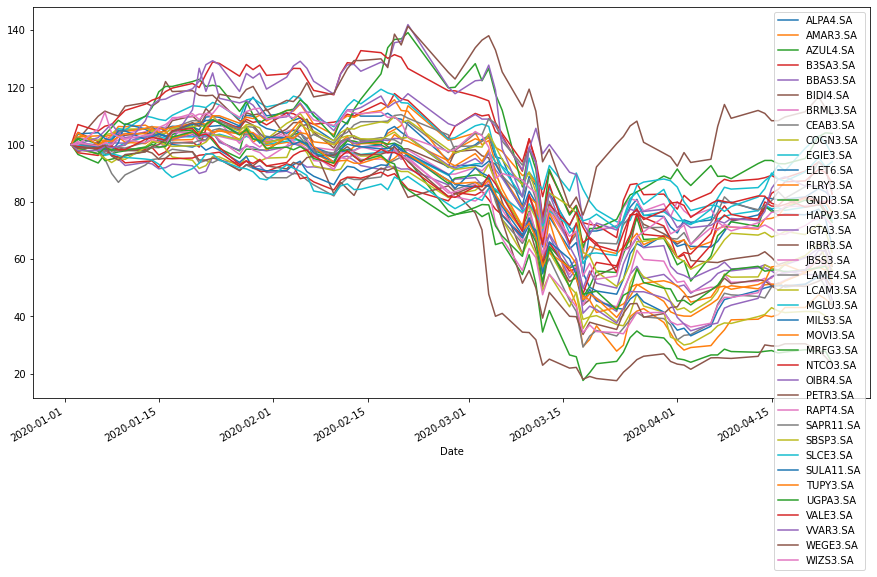

In [59]:
(df_carteira/df_carteira.iloc[0]*100).plot(figsize=(15,8))

In [0]:
#para obeter a fronteira eficiente precisaremos obeter os retornos logaritmos.
log_returns= np.log(df_carteira/df_carteira.shift(1))

In [61]:
log_returns.mean()*250

ALPA4.SA    -0.679348
AMAR3.SA    -2.713059
AZUL4.SA    -4.723023
B3SA3.SA    -0.625377
BBAS3.SA    -2.568470
BIDI4.SA    -1.823176
BRML3.SA    -2.212189
CEAB3.SA    -2.710522
COGN3.SA    -3.201342
EGIE3.SA    -1.011918
ELET6.SA    -1.447454
FLRY3.SA    -0.889983
GNDI3.SA    -1.041041
HAPV3.SA    -0.927525
IGTA3.SA    -1.704236
IRBR3.SA    -4.813268
JBSS3.SA    -0.767452
LAME4.SA    -0.573457
LCAM3.SA    -1.902395
MGLU3.SA    -0.118552
MILS3.SA    -2.171389
MOVI3.SA    -2.178463
MRFG3.SA     0.125114
NTCO3.SA    -0.469671
OIBR4.SA    -0.774059
PETR3.SA    -2.301832
RAPT4.SA    -2.040588
SAPR11.SA   -0.357780
SBSP3.SA    -1.552481
SLCE3.SA    -0.204965
SULA11.SA   -2.165734
TUPY3.SA    -1.781367
UGPA3.SA    -2.065894
VALE3.SA    -0.711699
VVAR3.SA    -2.003229
WEGE3.SA     0.323109
WIZS3.SA    -1.095104
dtype: float64

In [62]:
log_returns.cov()

,ALPA4.SA,AMAR3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BIDI4.SA,BRML3.SA,CEAB3.SA,COGN3.SA,EGIE3.SA,ELET6.SA,FLRY3.SA,GNDI3.SA,HAPV3.SA,IGTA3.SA,IRBR3.SA,JBSS3.SA,LAME4.SA,LCAM3.SA,MGLU3.SA,MILS3.SA,MOVI3.SA,MRFG3.SA,NTCO3.SA,OIBR4.SA,PETR3.SA,RAPT4.SA,SAPR11.SA,SBSP3.SA,SLCE3.SA,SULA11.SA,TUPY3.SA,UGPA3.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,WIZS3.SA
ALPA4.SA,0.004107,0.004531,0.005567,0.002209,0.002290,0.003454,0.002791,0.003976,0.003178,0.001037,0.002358,0.002083,0.003194,0.002939,0.002786,0.002797,0.002871,0.002644,0.004018,0.003464,0.003048,0.003475,0.003650,0.002769,0.001781,0.003781,0.003714,0.000879,0.002233,0.001083,0.001238,0.001785,0.002955,0.001965,0.004293,0.002467,0.002477
AMAR3.SA,0.004531,0.010467,0.009023,0.003560,0.004365,0.004969,0.004467,0.006649,0.005450,0.001810,0.004420,0.002941,0.004601,0.004189,0.004180,0.004513,0.003426,0.004333,0.007428,0.005339,0.004794,0.006363,0.004906,0.005485,0.003166,0.004978,0.005358,0.000750,0.004135,0.002230,0.001044,0.002677,0.005212,0.002918,0.007714,0.003406,0.003454
AZUL4.SA,0.005567,0.009023,0.011761,0.004597,0.005014,0.006622,0.005431,0.007324,0.006208,0.002191,0.005106,0.003821,0.005813,0.005120,0.005309,0.005687,0.004666,0.005419,0.007564,0.006674,0.005048,0.006357,0.006300,0.005949,0.003312,0.006379,0.006103,0.001132,0.004291,0.002271,0.001671,0.003161,0.006267,0.003840,0.008165,0.004742,0.004720
B3SA3.SA,0.002209,0.003560,0.004597,0.002779,0.002667,0.002888,0.002411,0.002952,0.002677,0.001215,0.002620,0.001709,0.002523,0.002223,0.002568,0.002409,0.002252,0.002567,0.003129,0.003155,0.002187,0.003048,0.002777,0.003042,0.001464,0.003301,0.002609,0.000764,0.002066,0.001223,0.001033,0.001400,0.003147,0.002230,0.003750,0.002064,0.002066
BBAS3.SA,0.002290,0.004365,0.005014,0.002667,0.003382,0.003131,0.002924,0.003415,0.003168,0.001431,0.002987,0.001914,0.002925,0.002553,0.002802,0.003082,0.002240,0.002807,0.003669,0.003390,0.002549,0.003396,0.002936,0.003381,0.001685,0.003464,0.002910,0.000575,0.002660,0.001239,0.000800,0.001600,0.003494,0.002415,0.004095,0.001868,0.002495
BIDI4.SA,0.003454,0.004969,0.006622,0.002888,0.003131,0.005769,0.003244,0.004019,0.003901,0.001562,0.003325,0.002275,0.003794,0.003379,0.003057,0.003592,0.003125,0.003576,0.004397,0.004109,0.003156,0.003686,0.004394,0.003304,0.002095,0.004571,0.003847,0.000990,0.002690,0.001546,0.001566,0.002087,0.004139,0.002975,0.004936,0.002984,0.002847
BRML3.SA,0.002791,0.004467,0.005431,0.002411,0.002924,0.003244,0.003822,0.003783,0.003407,0.001407,0.002665,0.002112,0.003083,0.002735,0.003194,0.002822,0.002351,0.002768,0.004031,0.003411,0.002691,0.003502,0.002954,0.003076,0.001500,0.003284,0.003246,0.000657,0.002659,0.001297,0.000902,0.001646,0.003260,0.001928,0.004494,0.002156,0.002821
CEAB3.SA,0.003976,0.006649,0.007324,0.002952,0.003415,0.004019,0.003783,0.006313,0.004308,0.001409,0.003380,0.002600,0.004027,0.003668,0.003493,0.003675,0.002582,0.003726,0.005437,0.004382,0.004044,0.004710,0.003858,0.004093,0.002540,0.004213,0.004581,0.000802,0.003239,0.001430,0.000937,0.002291,0.004144,0.002190,0.006144,0.003220,0.003182
COGN3.SA,0.003178,0.005450,0.006208,0.002677,0.003168,0.003901,0.003407,0.004308,0.005377,0.001741,0.003198,0.002359,0.003592,0.003288,0.003352,0.003591,0.002809,0.003438,0.004782,0.004050,0.003461,0.004096,0.003741,0.003910,0.002028,0.003693,0.003996,0.000839,0.002940,0.001749,0.001129,0.002146,0.004114,0.002485,0.004945,0.002671,0.002651
EGIE3.SA,0.001037,0.001810,0.002191,0.001215,0.001431,0.001562,0.001407,0.001409,0.001741,0.001042,0.001433,0.000927,0.001292,0.001101,0.001290,0.000957,0.001208,0.001424,0.001553,0.001574,0.001158,0.001619,0.001561,0.001457,0.000772,0.001536,0.001470,0.000443,0.001321,0.000797,0.000593,0.000783,0.001848,0.001284,0.001922,0.000907,0.001007


In [63]:
log_returns.corr()

,ALPA4.SA,AMAR3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BIDI4.SA,BRML3.SA,CEAB3.SA,COGN3.SA,EGIE3.SA,ELET6.SA,FLRY3.SA,GNDI3.SA,HAPV3.SA,IGTA3.SA,IRBR3.SA,JBSS3.SA,LAME4.SA,LCAM3.SA,MGLU3.SA,MILS3.SA,MOVI3.SA,MRFG3.SA,NTCO3.SA,OIBR4.SA,PETR3.SA,RAPT4.SA,SAPR11.SA,SBSP3.SA,SLCE3.SA,SULA11.SA,TUPY3.SA,UGPA3.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,WIZS3.SA
ALPA4.SA,1.000000,0.691140,0.800937,0.653801,0.614370,0.709696,0.704434,0.780787,0.676341,0.501376,0.615618,0.751911,0.769687,0.786974,0.741632,0.486436,0.753353,0.681917,0.778061,0.769660,0.730850,0.760176,0.774179,0.622005,0.549193,0.774376,0.823787,0.691827,0.635862,0.443901,0.767227,0.596685,0.653204,0.565331,0.730544,0.685343,0.638784
AMAR3.SA,0.691140,1.000000,0.813238,0.660133,0.733617,0.639444,0.706244,0.817957,0.726398,0.548198,0.722785,0.665122,0.694628,0.702561,0.696989,0.491728,0.563063,0.700048,0.901128,0.743074,0.720027,0.871876,0.651887,0.771784,0.611664,0.638669,0.744374,0.692388,0.737635,0.572670,0.758540,0.560484,0.721731,0.525754,0.822348,0.592576,0.557963
AZUL4.SA,0.800937,0.813238,1.000000,0.804135,0.794992,0.803901,0.810005,0.849991,0.780607,0.625925,0.787598,0.815060,0.827797,0.810082,0.835120,0.584518,0.723509,0.825877,0.865599,0.876215,0.715206,0.821648,0.789635,0.789618,0.603695,0.772020,0.799938,0.660628,0.722074,0.550404,0.768015,0.624278,0.818575,0.652643,0.821127,0.778283,0.719154
B3SA3.SA,0.653801,0.660133,0.804135,1.000000,0.869807,0.721420,0.739928,0.704851,0.692495,0.713720,0.831568,0.750068,0.739202,0.723706,0.831166,0.509421,0.718460,0.804897,0.736590,0.852257,0.637477,0.810548,0.716199,0.830523,0.548912,0.822011,0.703491,0.668235,0.715271,0.609462,0.710891,0.568953,0.845588,0.779903,0.775794,0.697075,0.647714
BBAS3.SA,0.614370,0.733617,0.794992,0.869807,1.000000,0.708825,0.813367,0.739067,0.742722,0.762032,0.859104,0.761410,0.776753,0.753270,0.821890,0.590787,0.647663,0.797693,0.782967,0.830051,0.673388,0.818649,0.686289,0.836915,0.572542,0.781716,0.711178,0.652196,0.834863,0.559867,0.713967,0.589237,0.850977,0.765327,0.767992,0.571668,0.709001
BIDI4.SA,0.709696,0.639444,0.803901,0.721420,0.708825,1.000000,0.690874,0.666027,0.700466,0.637235,0.732266,0.692787,0.771473,0.763461,0.686665,0.527141,0.691764,0.778161,0.718516,0.770369,0.638551,0.680279,0.786439,0.626093,0.545102,0.789986,0.719990,0.615427,0.646285,0.534796,0.766435,0.588647,0.771960,0.722009,0.708729,0.699436,0.619402
BRML3.SA,0.704434,0.706244,0.810005,0.739928,0.813367,0.690874,1.000000,0.770092,0.751573,0.705032,0.721169,0.790440,0.770273,0.759133,0.881336,0.508796,0.639554,0.740109,0.809210,0.785555,0.668790,0.794055,0.649631,0.716143,0.479585,0.697200,0.746288,0.689983,0.785054,0.551358,0.746170,0.570308,0.746977,0.574994,0.792814,0.620780,0.754045
CEAB3.SA,0.780787,0.817957,0.849991,0.704851,0.739067,0.666027,0.770092,1.000000,0.739324,0.549223,0.711506,0.756886,0.782829,0.792102,0.750026,0.515505,0.546485,0.774939,0.849186,0.785282,0.782117,0.830963,0.660088,0.741439,0.631895,0.695916,0.819499,0.727265,0.744029,0.473090,0.668934,0.617683,0.738839,0.508058,0.843254,0.721466,0.661674
COGN3.SA,0.676341,0.726398,0.780607,0.692495,0.742722,0.700466,0.751573,0.739324,1.000000,0.735511,0.729483,0.744226,0.756576,0.769445,0.779844,0.545838,0.644168,0.774783,0.809404,0.786376,0.725300,0.782992,0.693436,0.767433,0.546709,0.661015,0.774577,0.693604,0.731674,0.626892,0.734404,0.626886,0.794676,0.624707,0.735412,0.648270,0.597315
EGIE3.SA,0.501376,0.548198,0.625925,0.713720,0.762032,0.637235,0.705032,0.549223,0.735511,1.000000,0.742488,0.663964,0.617911,0.585502,0.681926,0.330404,0.629319,0.729060,0.596880,0.694189,0.551296,0.702985,0.657483,0.649502,0.472811,0.624477,0.647147,0.675181,0.746730,0.648613,0.711040,0.519762,0.810732,0.732902,0.649349,0.499927,0.515263


In [64]:
#definir uma variável que cinta o número de aticos que compoem a carteira 
num_carteira = len(carteira)
num_carteira

37

In [65]:
#Definir dois pessos aleartórios
arr= np.random.random(3)
arr

array([0.83989592, 0.35584028, 0.00831063])

In [66]:
arr[0]+arr[1]+arr[2]

1.2040468337226875

In [67]:
#definir que a soma dos pessos aleatórops somem 1
weights = np.random.random(num_carteira)
weights /= np.sum(weights) #soma das matrizes divididas pelos seus respectivos pesos
weights

array([0.04488764, 0.05326921, 0.0383056 , 0.02329588, 0.00830762,
       0.05942975, 0.01495242, 0.01935653, 0.0397521 , 0.02906056,
       0.00030097, 0.03638492, 0.01198814, 0.03229942, 0.06487781,
       0.01312641, 0.01184999, 0.01039496, 0.05072054, 0.01011299,
       0.05438852, 0.04037377, 0.01745138, 0.00761664, 0.00564946,
       0.04268179, 0.05551596, 0.00218171, 0.0482679 , 0.02654593,
       0.0183131 , 0.00334119, 0.01503505, 0.02573366, 0.00870676,
       0.03995749, 0.01556619])

In [68]:
weights[0]+weights[1]+weights[2]

0.13646245419431952

###Retorno esperado de um portifólio
Soma da média dos retornos logarítmico anualizados ponderados pelo seus pesos.

In [69]:
np.sum(weights*log_returns.mean())*250

-1.725225294087912

In [70]:
#Variancia
np.dot(weights.T, np.dot(log_returns.cov()*250, weights))

0.8189853660758702

In [71]:
#Volatilidade
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))

0.9049781025394318

In [72]:
#Criar um gráfico onde 1000 simulac'ões de média varoância serão plotadas (1000 combinacoes dos mesmos ativos)

pfolio_returns = []
pfolio_volatilities = []

for x in range(2000):
  weights = np.random.random(num_carteira)
  weights /= np.sum(weights)
  pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
  pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))

pfolio_returns, pfolio_volatilities

([-1.4829221162732709,
  -1.4767636682813783,
  -1.6077637480139702,
  -1.5185984915357835,
  -1.5975758042088297,
  -1.5827342487031597,
  -1.7118027024777258,
  -1.4820312166032639,
  -1.728034088621006,
  -1.6038340018964634,
  -1.5608581724788952,
  -1.6342750279077578,
  -1.4677475058923541,
  -1.6549381901468283,
  -1.602462883775292,
  -1.635762883327864,
  -1.54685689470365,
  -1.597410411946877,
  -1.5206181237414795,
  -1.6270208457344184,
  -1.640537536844627,
  -1.2997384419795746,
  -1.7358799599147703,
  -1.5127539510340013,
  -1.6133281353206732,
  -1.6345409058952658,
  -1.3956682083115552,
  -1.530302319846218,
  -1.5717548780926034,
  -1.5577011510450418,
  -1.5321290051790588,
  -1.8122002270886306,
  -1.5818019827471097,
  -1.683571894939296,
  -1.4110641137995812,
  -1.4924809742740033,
  -1.8060205426882452,
  -1.6076801747679603,
  -1.5337549547205613,
  -1.6397731254657317,
  -1.520874934468905,
  -1.5601026543011705,
  -1.496777467267259,
  -1.5515516025026463,

In [73]:
#converter essas listas em array
pfolio_returns = []
pfolio_volatilities = []

for x in range(10000):
  weights = np.random.random(num_carteira)
  weights /= np.sum(weights)
  pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
  pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([-1.60161038, -1.61236003, -1.58790113, ..., -1.5647546 ,
        -1.46324821, -1.37076445]),
 array([0.84858992, 0.85893938, 0.87107252, ..., 0.85581741, 0.8555291 ,
        0.85346168]))

In [74]:
#Criar um data frame com duas colunas uma com os retornos e outra com as volatilidades
portifolio = pd.DataFrame({"Return": pfolio_returns, "Volatility": pfolio_volatilities})
portifolio.head()

,Return,Volatility
0,-1.601610,0.848590
1,-1.612360,0.858939
2,-1.587901,0.871073
3,-1.611726,0.843202
4,-1.345608,0.824427


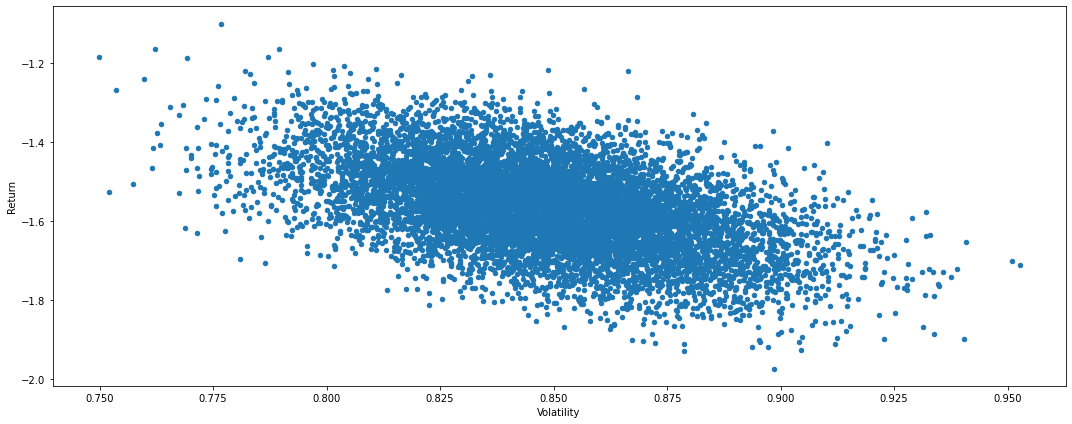

In [75]:
portifolio.plot(x="Volatility", y= "Return", kind= "scatter", figsize=(15,6))
plt.tight_layout();

#Medindo o Beta
Pode ser calculado como a variancia emtre a ação e o mercado dividido pela variância DO MERCADO.


In [0]:
#Importando apenas o Adj Close de uma determinada carteira.
carteira_beta = ["PETR4.SA", "BOVA11.SA"]
df_carteira_beta = pd.DataFrame()
for acoes in carteira_beta:
  df_carteira_beta[acoes] = wb.DataReader(acoes, data_source = "yahoo", start = "2015-1-1")["Adj Close"]

In [77]:
df_carteira_beta.head()

,PETR4.SA,BOVA11.SA
Date,,
2015-01-02,8.683705,47.259998
2015-01-05,7.941508,46.320000
2015-01-06,7.681740,46.580002
2015-01-07,8.043562,48.150002
2015-01-08,8.563099,48.509998


In [78]:
#Beta mostra ate que ponto a variacao de um um ativo esta relacionado com a variacao geral do mercado.
sec_returns = np.log(df_carteira_beta/df_carteira_beta.shift(1))


cov = sec_returns.cov()*250
cov

,PETR4.SA,BOVA11.SA
PETR4.SA,0.307813,0.121051
BOVA11.SA,0.121051,0.076724


In [79]:
#numerador da formula do beta em forma float
cov_with_market = cov.iloc[0,1]
cov_with_market

0.12105132424908112

In [80]:
#denominador - variancia do mercado anualizada
market_var = sec_returns["BOVA11.SA"].var()*250
market_var

0.0767242443298208

In [81]:
# entao o beta é a variancia enmtre a acao e o mercado (covariancia) dividida pela variancia do mercado.
#escolher bem os periodos antes de realizar o calculo do beta. Exemplo quando ha fortes mudancas de marcado como o caso do covid 19.

# é possivel consulytar o beta de uma acoa atraves do google finance
Petr4_beta = cov_with_market/market_var
Petr4_beta

1.5777454089832135